# Lista 1 - Estatística Univariada

Aluno: José Augusto Agripino de Oliveira

Professor: Dr. Luiz Affonso H. G. de Oliveira

Disciplina: PPGEEC2325 - Aprendizado não supervisionado de máquina (2025.2)

Universidade Federal do Rio Grande do Norte

#### 1) Seja a v.a. X definida como a soma de n v.a. ($X = X_1 + X_2 + ... + X_n$) uniformemente distribuídas entre 0 e 1. Desenvolva um programa para obter a média ($E[X]$), a variância ($s²[X]$) e o segundo momento ($E[X²]$). Gere os gráficos das funções densidade de probabilidade ($f_X(X)$) e distribuição de probabilidade ($F_X(X)$), para o caso de n = 1, 2, ..., 12. Analise os resultados. Para qual distribuição a v.a. X tende quando o valor de n aumenta? Por que isto ocorre? Há uma expressão para a média e a variância em função de n? Sugestão: use tamanho de 10.000 amostras para gerar cada sequência de v.a.


Sejam $X_1, X_2, \dots, X_n$ variáveis aleatórias **independentes** com funções densidade de probabilidade (fdp) $f_{X_1}, f_{X_2}, \dots, f_{X_n}$.  
A variável aleatória $Z$, definida como a **soma**

$
Z = X_1 + X_2 + \dots + X_n,
$

terá sua distribuição dada pela **convolução** das distribuições individuais:

$
f_Z(z) = (f_{X_1} * f_{X_2} * \dots * f_{X_n})(z).
$

Esse resultado é a base para entender que, ao somar muitas v.a. independentes (mesmo não sendo normais), a distribuição de $Z$ tende a uma normal, conforme o **Teorema Central do Limite**.

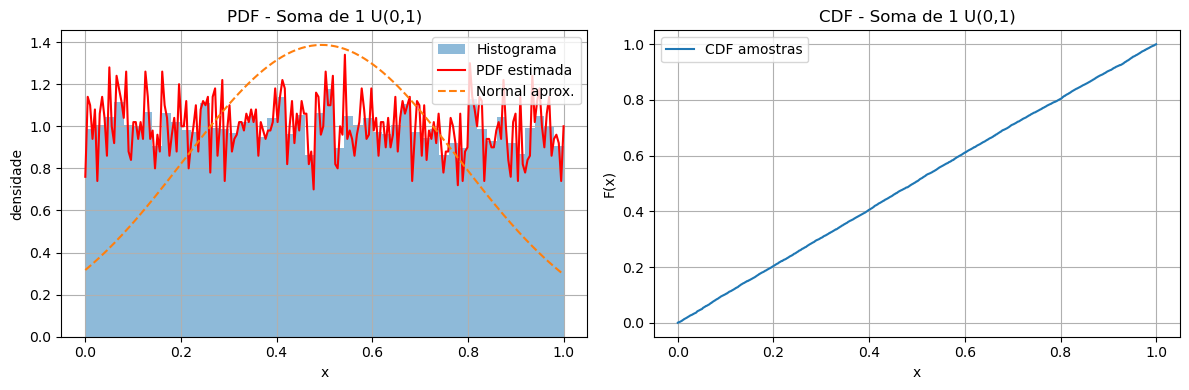

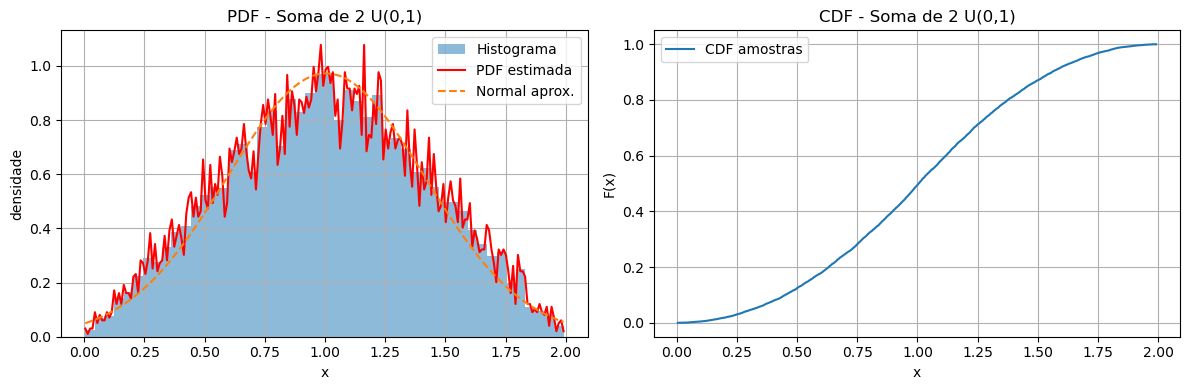

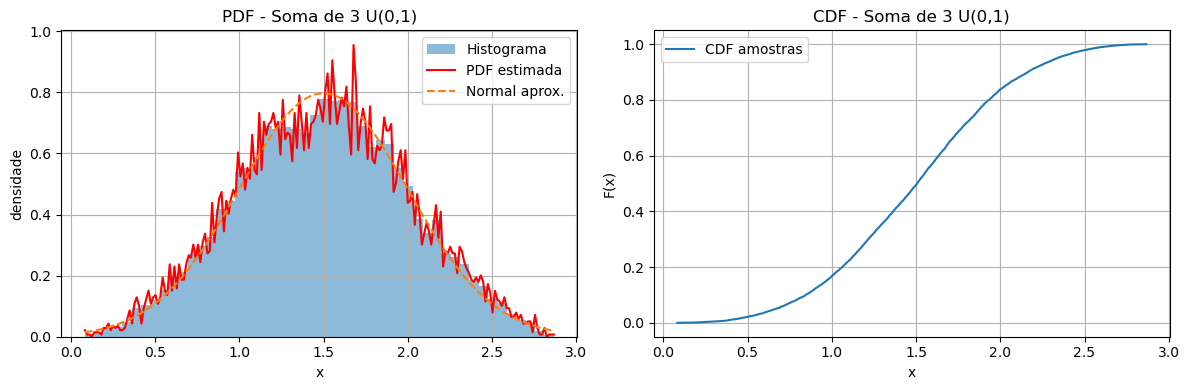

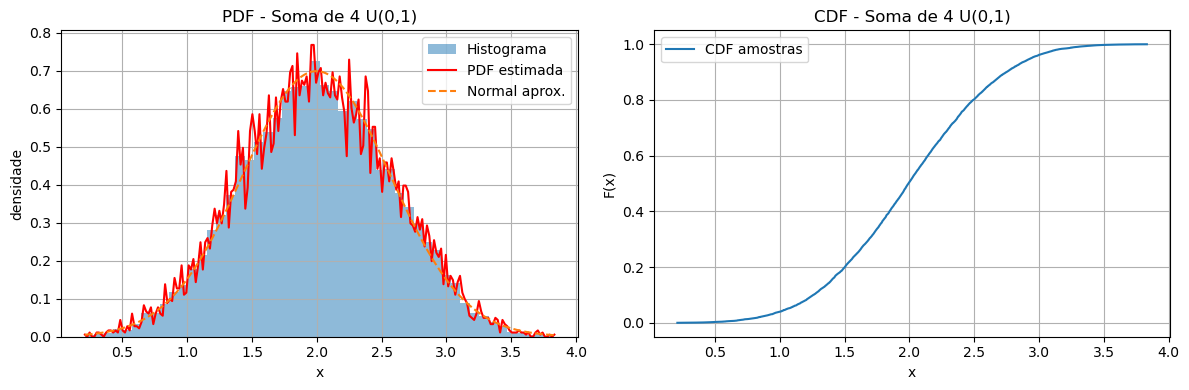

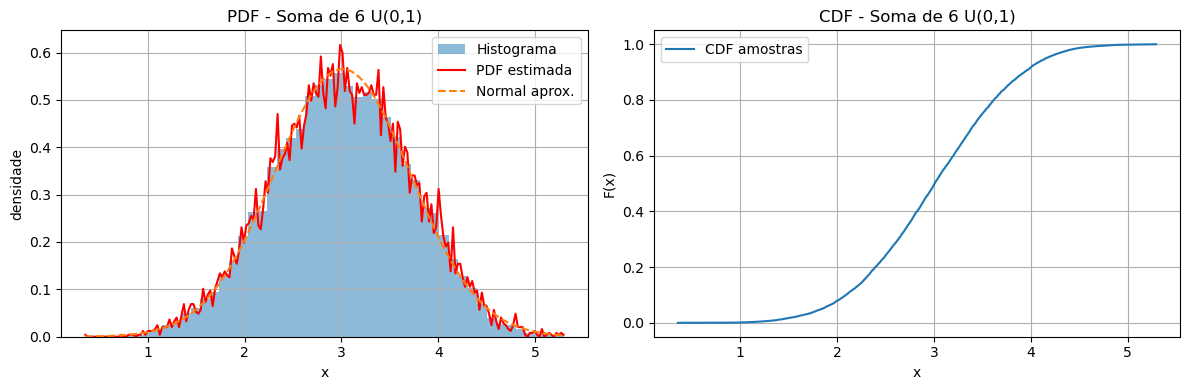

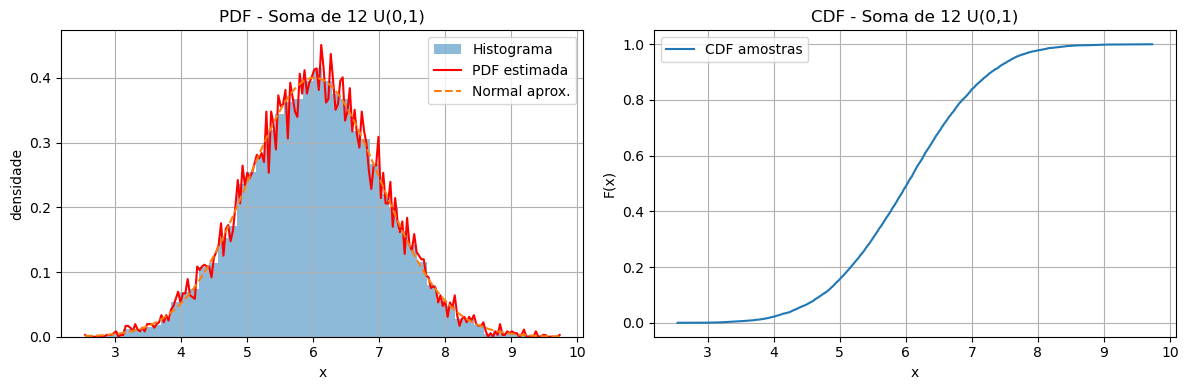

  n | Mean_emp  Mean_theo |  Var_emp   Var_theo |   E[X^2]_emp  E[X^2]_theo
--------------------------------------------------------------------------------
  1 |    0.494      0.500 |    0.083      0.083 |        0.327        0.333
  2 |    1.005      1.000 |    0.168      0.167 |        1.178        1.167
  3 |    1.499      1.500 |    0.251      0.250 |        2.497        2.500
  4 |    1.997      2.000 |    0.326      0.333 |        4.316        4.333
  6 |    3.008      3.000 |    0.498      0.500 |        9.547        9.500
 12 |    6.015      6.000 |    0.993      1.000 |       37.178       37.000


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)  # para reprodutibilidade
n_samples = 10000
ns = [1,2,3,4,6,12]
results = {}

for n in ns:
    # Gerar amostras aleatórias
    samples = np.sum(np.random.uniform(0, 1, size=(n_samples, n)), axis=1)
    
    # Momentos empíricos
    mean_emp = np.mean(samples)
    var_emp = np.var(samples)
    second_moment_emp = np.mean(samples**2)
    
    # Momentos teóricos
    mean_theo = n * 0.5
    var_theo = n * (1/12)
    second_moment_theo = var_theo + mean_theo**2
    
    results[n] = {
        "samples": samples, 
        "mean_emp": mean_emp, "var_emp": var_emp, "second_moment_emp": second_moment_emp,
        "mean_theo": mean_theo, "var_theo": var_theo, "second_moment_theo": second_moment_theo
    }
    
    # PDF e CDF
    x = np.linspace(samples.min(), samples.max(), 200)
    pdf_est = np.histogram(samples, bins=200, density=True)[0]
    bin_centers = np.linspace(samples.min(), samples.max(), 200)
    cdf_est = np.cumsum(pdf_est)*(bin_centers[1]-bin_centers[0])
    
    # Gráficos
    plt.figure(figsize=(12,4))
    
    # PDF
    plt.subplot(1,2,1)
    plt.hist(samples, bins=50, density=True, alpha=0.5, label='Histograma')
    plt.plot(bin_centers, pdf_est, 'r-', label='PDF estimada')
    
    # Normal aproximada
    sigma = np.sqrt(var_emp)
    plt.plot(x, norm.pdf(x, mean_emp, sigma), '--', label='Normal aprox.')
    plt.title(f"PDF - Soma de {n} U(0,1)")
    plt.xlabel("x")
    plt.ylabel("densidade")
    plt.legend()
    plt.grid(True)
    
    # CDF
    plt.subplot(1,2,2)
    plt.plot(np.sort(samples), np.arange(1, n_samples+1)/n_samples, label='CDF amostras')
    plt.title(f"CDF - Soma de {n} U(0,1)")
    plt.xlabel("x")
    plt.ylabel("F(x)")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Exibir tabela comparativa
print(f"{'n':>3} | {'Mean_emp':>8} {'Mean_theo':>10} | {'Var_emp':>8} {'Var_theo':>10} | {'E[X^2]_emp':>12} {'E[X^2]_theo':>12}")
print("-"*80)
for n in ns:
    r = results[n]
    print(f"{n:3d} | {r['mean_emp']:8.3f} {r['mean_theo']:10.3f} | {r['var_emp']:8.3f} {r['var_theo']:10.3f} | {r['second_moment_emp']:12.3f} {r['second_moment_theo']:12.3f}")

#### 2) Escreva um programa que, dado $Y = a·X² + b$, obtenha o histograma de $f(Y)$, sendo que $X$ é uma variável aleatória uniformemente distribuída entre 0 e 1. Teste o programa para as combinações de $a = 0, 0.5, 1, 2$ e $b = -1, 0, 1, 2, 4$, e compare com os respectivos $f(Y)$ teóricos. Analise como se comportam $E[X]$, $E[Y]$, $E[X²]$, $E[Y²]$, $Var(X)$, $Var(Y)$, $s(X)$, $s(Y)$, $Corr(X,Y)$ e $r(X,Y)$ em função dos valores de a e b. Utilize ao menos 1.000 amostras para X.

### Fórmula teórica de $f_Y(y)$ para $Y = a X^2 + b$, com $X \sim U(0,1)$

1. **CDF de $Y$:**

A função de distribuição acumulada (CDF) de $Y$ é dada por:

$F_Y(y) = P(Y \le y) = P(a X^2 + b \le y)$

Dependendo do sinal de $a$:

- **Se $a > 0$:**

$a X^2 + b \le y \implies X \le \sqrt{\frac{y-b}{a}}$

Portanto:

$F_Y(y) =
\begin{cases} 
0, & y < b \\
\sqrt{\frac{y-b}{a}}, & b \le y \le a+b \\
1, & y > a+b
\end{cases}$

- **Se $a < 0$**, o raciocínio é similar, mas a desigualdade se inverte.

---

2. **PDF de $Y$ (derivada da CDF):**

Para $a>0$, derivando a CDF obtemos a densidade de probabilidade teórica:

$f_Y(y) = \frac{d}{dy} F_Y(y) = \frac{1}{2 \sqrt{a (y-b)}}, \quad b \le y \le a+b$

Para $y$ fora do intervalo $[b, a+b]$, $f_Y(y) = 0$.

- Para $a<0$, a densidade muda o sinal e o suporte, mas a forma é análoga.

Em resumo, a fórmula teórica é:

$f_Y(y) = \frac{1}{2\sqrt{a (y-b)}} \quad \text{para } y \in [b, a+b]$

Esta função descreve como os valores de $Y$ estão distribuídos após a transformação quadrática e linear da variável uniforme $X$.

- Quadrática (não-linear): $X \mapsto X^2$

- Linear (translação): $X^2 \mapsto a X^2 + b$

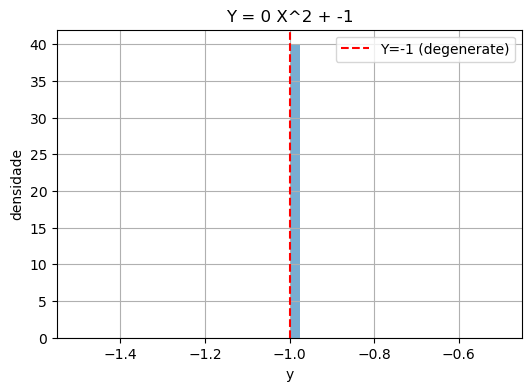

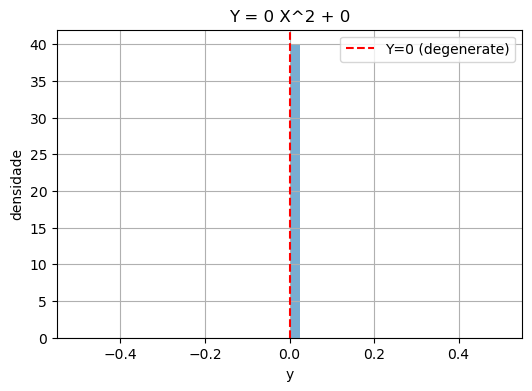

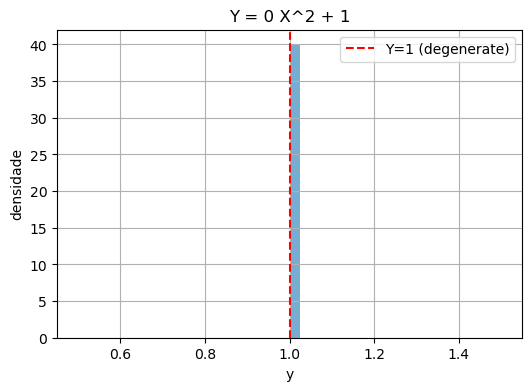

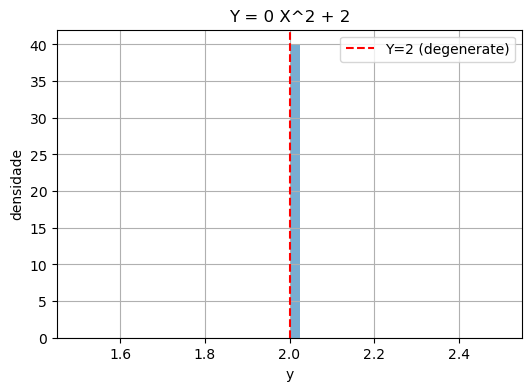

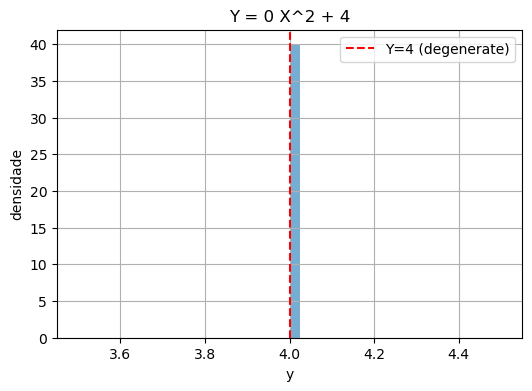

/tmp/ipykernel_919/3549605580.py:40: RuntimeWarning: divide by zero encountered in divide
  out[mask] = 1.0 / (2.0 * np.sqrt(a) * np.sqrt(y[mask] - b))


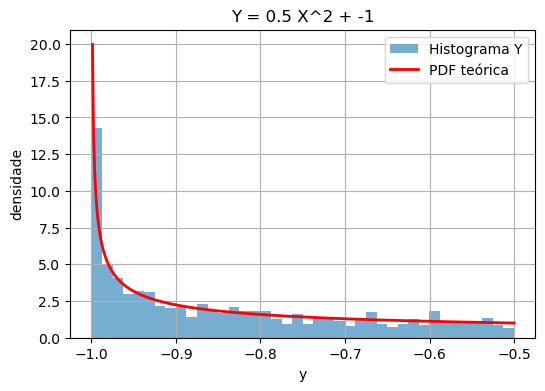

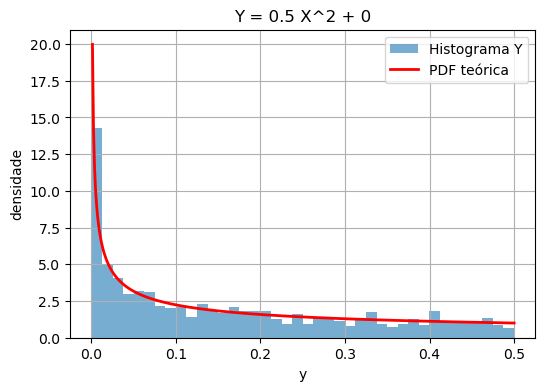

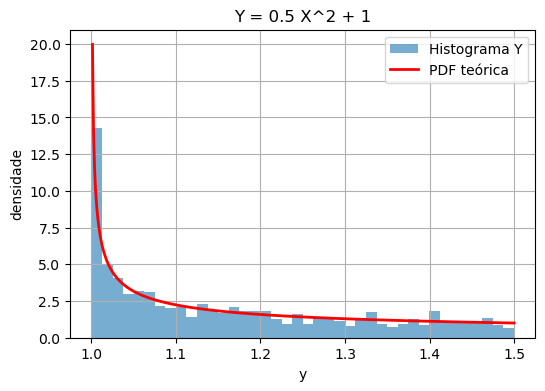

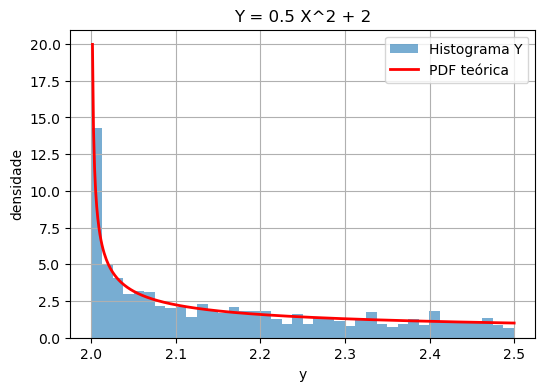

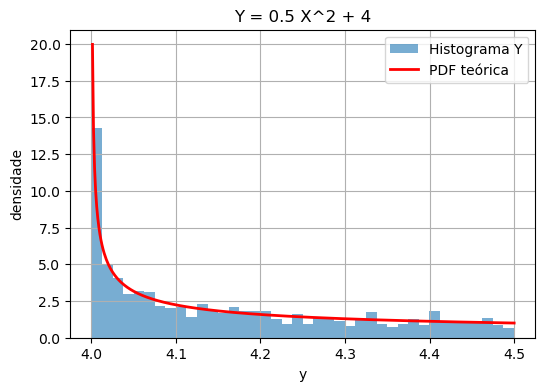

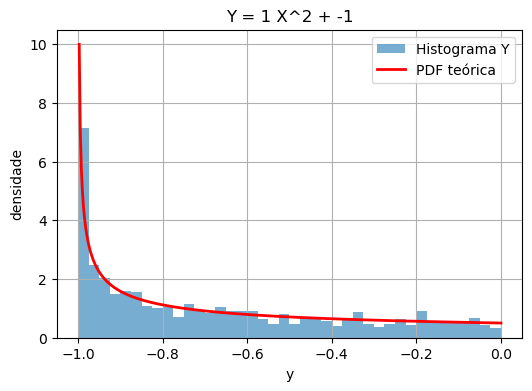

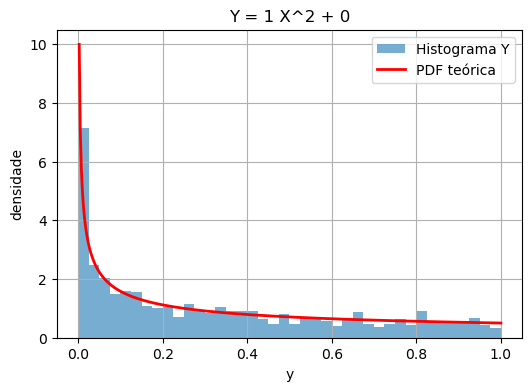

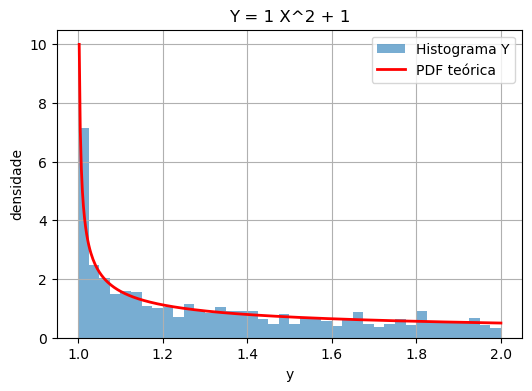

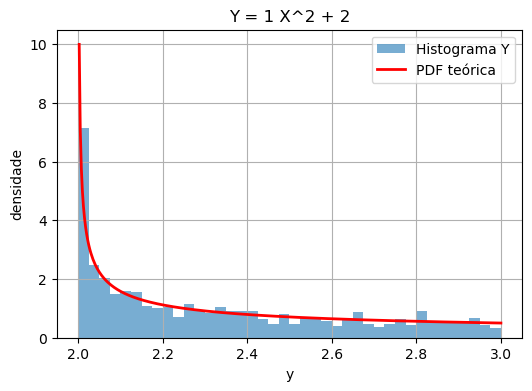

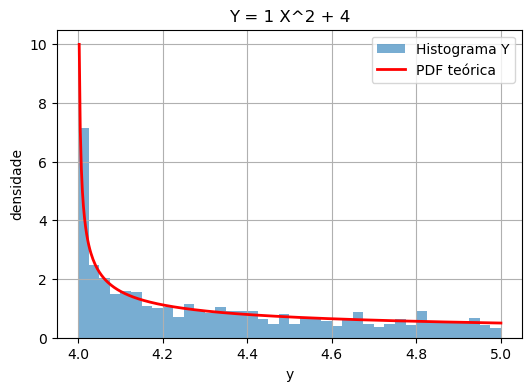

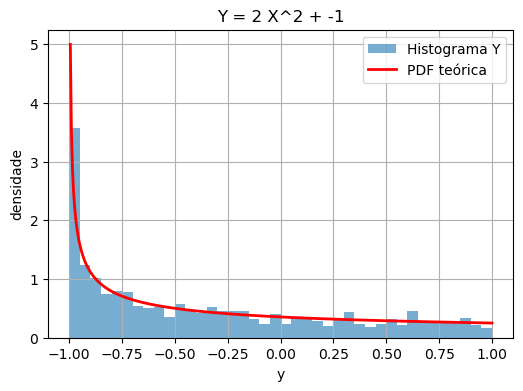

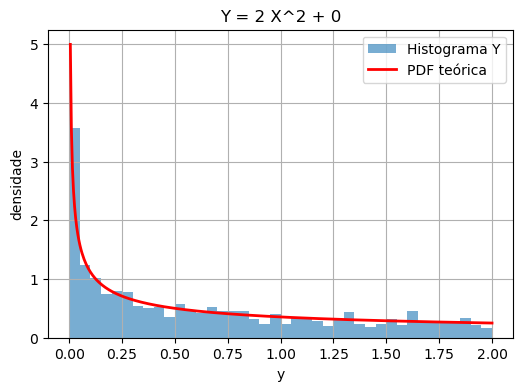

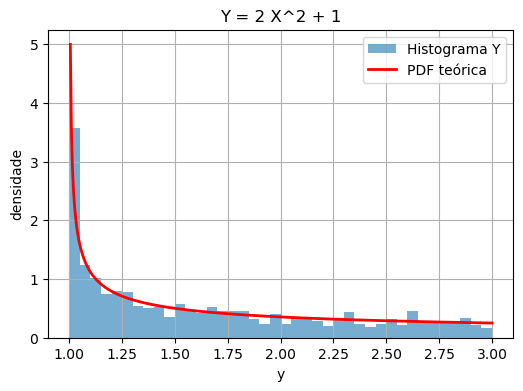

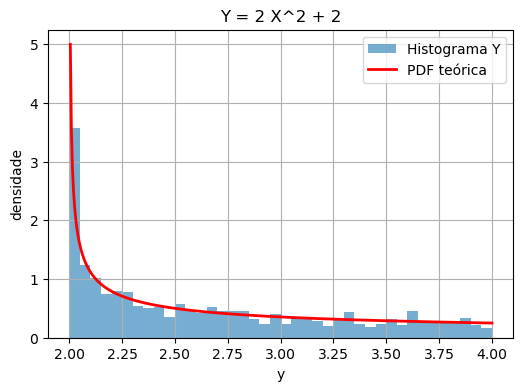

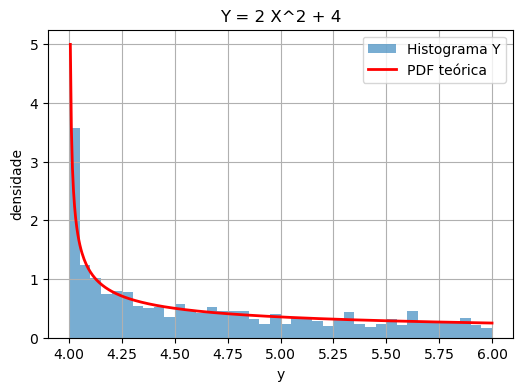

      a  b      E[X]      E[Y]   E[X^2]     E[Y^2]    Var(X)    Var(Y)  \
0   0.0 -1  0.490257 -1.000000  0.32561   1.000000  0.085259  0.000000   
1   0.0  0  0.490257  0.000000  0.32561   0.000000  0.085259  0.000000   
2   0.0  1  0.490257  1.000000  0.32561   1.000000  0.085259  0.000000   
3   0.0  2  0.490257  2.000000  0.32561   4.000000  0.085259  0.000000   
4   0.0  4  0.490257  4.000000  0.32561  16.000000  0.085259  0.000000   
5   0.5 -1  0.490257 -0.837195  0.32561   0.723262  0.085259  0.022366   
6   0.5  0  0.490257  0.162805  0.32561   0.048872  0.085259  0.022366   
7   0.5  1  0.490257  1.162805  0.32561   1.374482  0.085259  0.022366   
8   0.5  2  0.490257  2.162805  0.32561   4.700093  0.085259  0.022366   
9   0.5  4  0.490257  4.162805  0.32561  17.351313  0.085259  0.022366   
10  1.0 -1  0.490257 -0.674390  0.32561   0.544267  0.085259  0.089466   
11  1.0  0  0.490257  0.325610  0.32561   0.195488  0.085259  0.089466   
12  1.0  1  0.490257  1.325610  0.3256

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 1000
X = np.random.uniform(0,1,N)

a_values = [0, 0.5, 1, 2]
b_values = [-1, 0, 1, 2, 4]

# Função para calcular métricas simuladas
def calc_stats(X, Y):
    varX = np.var(X)
    varY = np.var(Y)
    covXY = np.cov(X,Y, ddof=0)[0,1]
    corrXY = np.corrcoef(X,Y)[0,1] if np.std(Y) > 1e-12 else np.nan
    return {
        'E[X]': np.mean(X),
        'E[Y]': np.mean(Y),
        'E[X^2]': np.mean(X**2),
        'E[Y^2]': np.mean(Y**2),
        'Var(X)': varX,
        'Var(Y)': varY,
        's(X)': np.sqrt(varX),
        's(Y)': np.sqrt(varY),
        'Cov(X,Y)': covXY,
        'Corr(X,Y)': corrXY
    }

# Para armazenar resultados
results_table = []

# Função para a PDF teórica
def fY_theoretical(y, a, b):
    if a == 0:
        return np.zeros_like(y)  # caso degenerado
    if a > 0:
        mask = (y >= b) & (y <= a + b)
        out = np.zeros_like(y, dtype=float)
        out[mask] = 1.0 / (2.0 * np.sqrt(a) * np.sqrt(y[mask] - b))
        return out
    else:  # a < 0
        mask = (y >= a+b) & (y <= b)
        out = np.zeros_like(y, dtype=float)
        out[mask] = 1.0 / (2.0 * np.sqrt(-a) * np.sqrt(b - y[mask]))
        return out

# Loop sobre todas combinações de a e b
for a in a_values:
    for b in b_values:
        Y = a * X**2 + b
        stats = calc_stats(X, Y)
        stats['a'] = a
        stats['b'] = b
        results_table.append(stats)

        # Plot
        plt.figure(figsize=(6,4))
        if a == 0:
            plt.hist(Y, bins=40, density=True, alpha=0.6)
            plt.axvline(b, color='r', linestyle='--', label=f"Y={b} (degenerate)")
        else:
            plt.hist(Y, bins=40, density=True, alpha=0.6, label='Histograma Y')
            ygrid = np.linspace(min(b, a+b), max(b, a+b), 400)
            plt.plot(ygrid, fY_theoretical(ygrid, a, b), 'r-', lw=2, label='PDF teórica')
        plt.title(f"Y = {a} X^2 + {b}")
        plt.xlabel("y")
        plt.ylabel("densidade")
        plt.legend()
        plt.grid(True)
        plt.show()

# Converter para tabela
import pandas as pd
df = pd.DataFrame(results_table)
# Organizar colunas
cols = ['a','b','E[X]','E[Y]','E[X^2]','E[Y^2]',
        'Var(X)','Var(Y)','s(X)','s(Y)','Cov(X,Y)','Corr(X,Y)']
df = df[cols]
print(df)


#### 3) Escreva um programa que gere uma distribuição de densidade de probabilidade (PDF) exponencial ($f(x) = λ·e^{-λx}, x ≥ 0$ e $0$, caso contrário) a partir de uma distribuição uniformemente distribuída entre 0 e 1. O valor de $λ$ é definido no programa. Faça uma relação com os resultados obtidos na questão anterior. Sugestão: usar o método da transformação inversa.

Queremos gerar uma variável aleatória $ X $ com distribuição Exponencial de parâmetro $ \lambda $, cuja densidade de probabilidade (PDF) é:

$
f_X(x) = \lambda e^{-\lambda x}, \quad x \geq 0
$

e sua função distribuição acumulada (CDF) é:

$
F_X(x) = P(X \leq x) = 1 - e^{-\lambda x}, \quad x \geq 0
$

---

#### Método da Transformação Inversa

Seja $ U \sim U(0,1) $.  
Sabemos que:

$
U = F_X(X)
$

Portanto:

$
U = 1 - e^{-\lambda X}
$

Invertendo para obter $X$:

$
1 - U = e^{-\lambda X}
$

$
\ln(1-U) = -\lambda X
$

$
X = -\frac{1}{\lambda} \ln(1-U)
$

Assim, a partir de amostras de uma distribuição uniforme $ U(0,1) $, podemos gerar amostras de $ X \sim \text{Exponencial}(\lambda) $.

---

Na **Questão 2**, partimos de uma variável uniforme $X \sim U(0,1)$ e aplicamos uma transformação polinomial $Y = aX^2 + b$. O resultado foi uma nova distribuição cuja forma depende diretamente dos parâmetros $a$ e $b$, alterando deslocamento, escala e curvatura, mas mantendo uma relação determinística com a uniforme original.  

Já na **Questão 3**, utilizamos o **método da transformação inversa**, em que a CDF da distribuição exponencial foi invertida para transformar diretamente números uniformes em amostras exponenciais. Nesse caso, a forma da distribuição não depende de um polinômio simples, mas da função logarítmica obtida pela inversão da CDF.  

Em termos de resultado, ambas as questões mostram como **uma uniforme pode ser usada para gerar distribuições não uniformes**. A diferença é que, na Questão 2, a transformação é algébrica e gera distribuições específicas ligadas a $a$ e $b$, enquanto na Questão 3 a transformação é fundamentada na CDF, garantindo a geração exata de uma distribuição alvo (a exponencial).


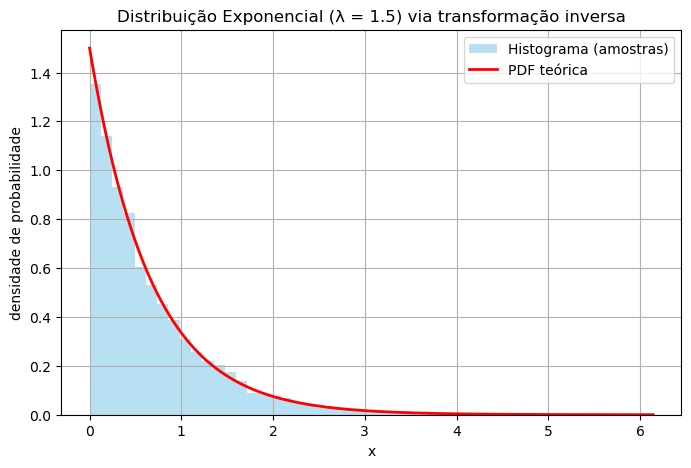

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetro da distribuição exponencial
lmbda = 1.5
N = 10000  # número de amostras

# 1. Gerar amostras de U(0,1)
U = np.random.rand(N)

# 2. Transformação inversa -> gerar amostras exponenciais
X = - (1 / lmbda) * np.log(1 - U)

# 3. Plotar histograma das amostras
plt.figure(figsize=(8, 5))
count, bins, _ = plt.hist(X, bins=50, density=True, alpha=0.6, color='skyblue', label="Histograma (amostras)")

# 4. PDF teórica
x_vals = np.linspace(0, X.max(), 200)
pdf = lmbda * np.exp(-lmbda * x_vals)
plt.plot(x_vals, pdf, 'r-', lw=2, label="PDF teórica")

plt.title(f"Distribuição Exponencial (λ = {lmbda}) via transformação inversa")
plt.xlabel("x")
plt.ylabel("densidade de probabilidade")
plt.legend()
plt.grid(True)
plt.show()

#### 4) Seja uma v.a. X com função densidade de probabilidade (PDF) Normal com média zero e variância igual a 1. Gere uma sequência desta distribuição com 10.000 pontos.  
#### a. Obtenha histogramas para os 10 primeiros pontos, os 100 primeiros pontos, os 1.000 primeiros pontos e os 10.000 pontos. Analise os resultados.  
#### b. Calcule a média e a variância considerando-se: os 10 primeiros pontos, os 100 primeiros pontos, os 1.000 primeiros pontos e os 10.000 pontos. Analise os resultados. Sugestão: plote os gráficos da média e variância em função do número de pontos utilizados.


**Observações teóricas**  
- Para a Normal padrão temos $E[X]=0$ e $\operatorname{Var}(X)=1$.  
- Pela LLN (lei dos grandes números) a média amostral converge para $0$ e a variância amostral converge para $1$ quando $n\to\infty$.  
- Em amostras pequenas observamos grandes flutuações; ao aumentar $n$ as estimativas se estabilizam.

**Tarefas**  
1. Gerar $N=10{,}000$ amostras $X_i\sim\mathcal{N}(0,1)$.  
2. Plotar 4 histogramas (usando a mesma escala x e mesmos bins para facilitar comparação).  
3. Calcular e imprimir média e variância amostral para $n\in\{10,100,1000,10000\}$.  
4. Calcular média e variância acumuladas (para cada $n$ de 1 a 10\,000) e plotá-las.  
5. Fazer uma breve análise dos resultados observados.


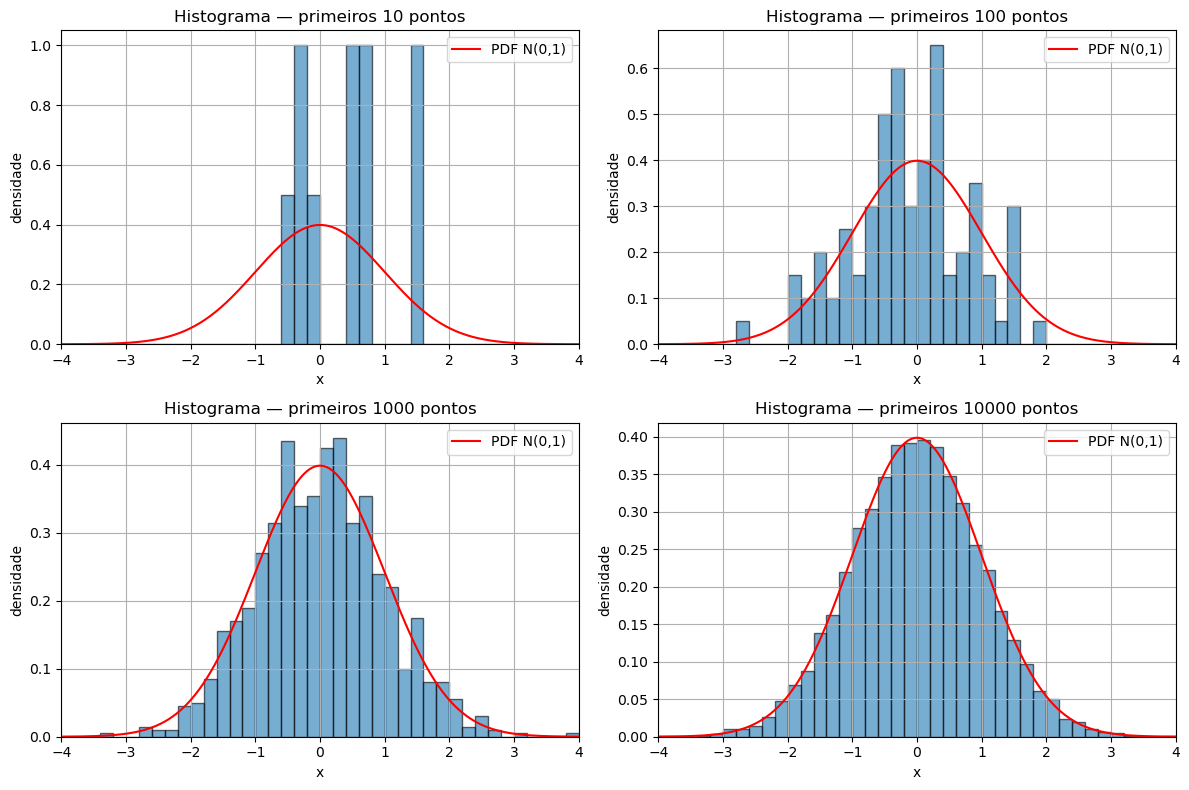

Resumo de médias e variâncias amostrais:
 n=    10: mean =  0.44806, var =  0.47047
 n=   100: mean = -0.10385, var =  0.81652
 n=  1000: mean =  0.01933, var =  0.95790
 n= 10000: mean = -0.00214, var =  1.00684


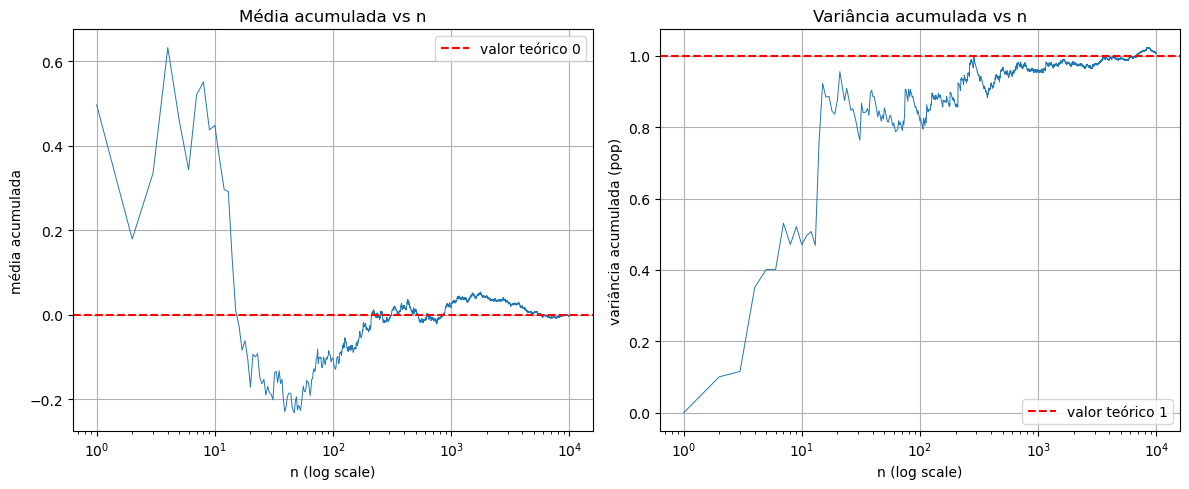


Valores finais (n = 10000):
 mean (n=10000) = -0.002136
 var  (n=10000) =  1.006836


In [1]:
# Código Python para resolver a Questão 4
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 10_000

# 1) Gerar amostras da Normal padrão
X = np.random.randn(N)  # Normal(0,1)

# Prefixos solicitados
prefix_sizes = [10, 100, 1000, 10_000]

# 2) Histogramas: usar mesma faixa x e mesmos bins para facilitar comparação
# escolher limites simétricos em torno de 0 (p.ex. ±4 sigma)
xlim = (-4, 4)
bins = np.linspace(xlim[0], xlim[1], 41)  # 40 bins

plt.figure(figsize=(12, 8))
for i, n in enumerate(prefix_sizes, 1):
    plt.subplot(2, 2, i)
    plt.hist(X[:n], bins=bins, density=True, alpha=0.6, edgecolor='k')
    # sobrepor PDF teórica da normal padrão
    xs = np.linspace(xlim[0], xlim[1], 400)
    pdf = (1/np.sqrt(2*np.pi))*np.exp(-0.5*xs**2)
    plt.plot(xs, pdf, 'r-', lw=1.5, label='PDF N(0,1)')
    plt.title(f'Histograma — primeiros {n} pontos')
    plt.xlim(xlim)
    plt.xlabel('x')
    plt.ylabel('densidade')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

# 3) Médias e variâncias para os tamanhos pedidos
print("Resumo de médias e variâncias amostrais:")
for n in prefix_sizes:
    mean_n = X[:n].mean()
    var_n = X[:n].var()   # ddof=0 (população). Se quiser amostra use ddof=1
    print(f" n={n:6d}: mean = {mean_n: .5f}, var = {var_n: .5f}")

# 4) Séries acumuladas de média e variância (para cada n = 1..N)
# média acumulada via cumsum
cum_sum = np.cumsum(X)
n_array = np.arange(1, N+1)
mean_cum = cum_sum / n_array

# variância populacional acumulada: Var_n = (sum(x^2)/n) - mean^2
cum_sum_sq = np.cumsum(X**2)
mean_sq = cum_sum_sq / n_array
var_cum = mean_sq - mean_cum**2

# plot média acumulada e variância acumulada
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(n_array, mean_cum, lw=0.7)
plt.axhline(0, color='r', linestyle='--', label='valor teórico 0')
plt.xscale('log')
plt.xlabel('n (log scale)')
plt.ylabel('média acumulada')
plt.title('Média acumulada vs n')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(n_array, var_cum, lw=0.7)
plt.axhline(1, color='r', linestyle='--', label='valor teórico 1')
plt.xscale('log')
plt.xlabel('n (log scale)')
plt.ylabel('variância acumulada (pop)')
plt.title('Variância acumulada vs n')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 5) Mostrar valores finais (n=N) e variações para referência
print("\nValores finais (n = 10000):")
print(f" mean (n={N}) = {mean_cum[-1]: .6f}")
print(f" var  (n={N}) = {var_cum[-1]: .6f}")


Histogramas (10 / 100 / 1.000 / 10.000):

- Para $n=10$ a forma do histograma é muito ruidosa e não lembra bem a forma de uma curva normal; poucos picos/vales aleatórios.

- Em $n=100$ já aparecem traços da forma gaussiana, mas ainda com flutuações visíveis.

- Em $n=1,000$ a aproximação à PDF teórica é bastante boa.

- Em $n=10,000$ o histograma é muito próximo da curva teórica $N(0,1)$ — ruído pequeno, boa cobertura do suporte.
Isso ilustra o efeito da amostra grande: o histograma converge para a PDF verdadeira.

Média e variância (prefixos):

- As estimativas para médias e variâncias oscilam mais em amostras pequenas. Por exemplo, a média para $n=10$ pode estar relativamente distante de $0$, e a variância pode diferir de $1$.

- À medida que $n$ cresce as estimativas se estabilizam perto dos valores teóricos ($E[X]=0$, $\operatorname{Var}(X)=1$). Isso é consequência da Lei dos Grandes Números.

- Os gráficos acumulados (média e variância vs $n$) mostram convergência: flutuações diminuem com $n$ e as linhas tendem ao valor teórico (traços horizontais em 0 e 1).

#### 5) Dado 2 v.a. independentes com distribuição Normal com médias zero e desvios padrões 1. Gere uma sequência com 5.000 amostras para cada uma delas. Então, obtenha a variável aleatória $Z = a \cdot X + b \cdot Y + C$. Calcule $\text{Cov}(X,Y)$, $\text{Cov}(X,Z)$, $E[Z]$ e $\text{Var}(Z)$ e compare com os valores teóricos. Plote os gráficos de dispersão de $(X,Z)$ e analise o resultado. Utilize $a = 1$, $b = \{-10, -1, -0.1, 0, 0.1, 1, 10\}$. $C$ é uma constante. Utilize $C = \{0, 5\}$.

**Valores teóricos** (pela independência e variâncias unitárias):  
- $Cov(X,Y)=0$  
- $Cov(X,Z)=Cov(X, aX+bY+C)=a \cdot Var(X)+b \cdot Cov(X,Y)=a$  
- $E[Z]=aE[X]+bE[Y]+C=C$  
- $Var(Z)=a^2 Var(X)+b^2 Var(Y)+2abCov(X,Y)=a^2 + b^2$

Obs.: É importante lembrar que X e Y são independentes, logo a covariância entre essas variáveis independentes é igual a zero. Além disso, $X{,} Y \sim \mathcal{N}(0,1)$, logo os resultados teóricas gerais para $Cov(X,Z)$, $E[Z]$ e $Var(Z)$ são bastante simplificados, ficando em função apenas das constantes $a$, $b$ ou $c$.

**Observações práticas para comparação**:  
- Usar estimadores de população (momento central):  
  $ \widehat{Cov}(U,V)=\frac{1}{N}\sum_{i=1}^N (u_i-\bar u)(v_i-\bar v)$  
  $ \widehat{E}[Z]=\frac1N\sum z_i,\quad \widehat{Var}(Z)=\frac{1}{N}\sum (z_i-\bar z)^2$  
- Para cada combinação imprimimos os valores empíricos e teóricos lado a lado.  
- Nos gráficos de dispersão $(X,Z)$ sobrepomos a reta teórica $E[Z|X=x] = ax + C$ (porque $E[Y|X]=0$ pela independência), que tem coeficiente angular $a$.  

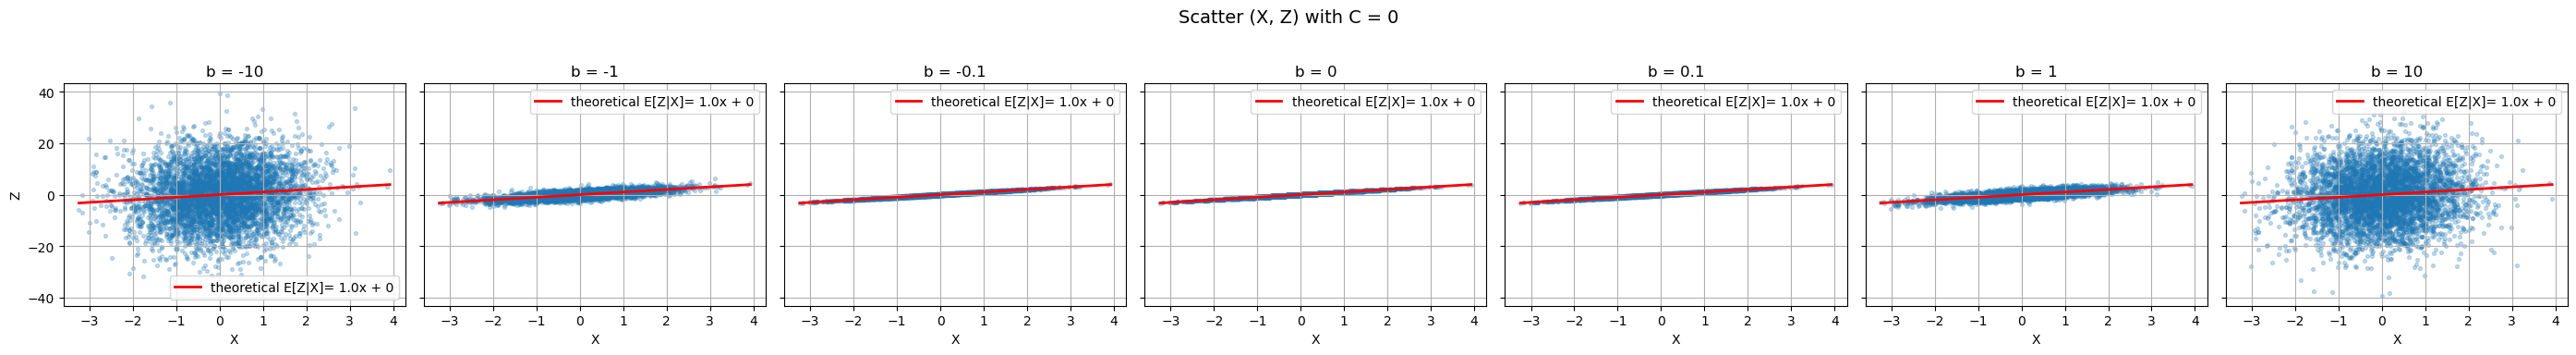

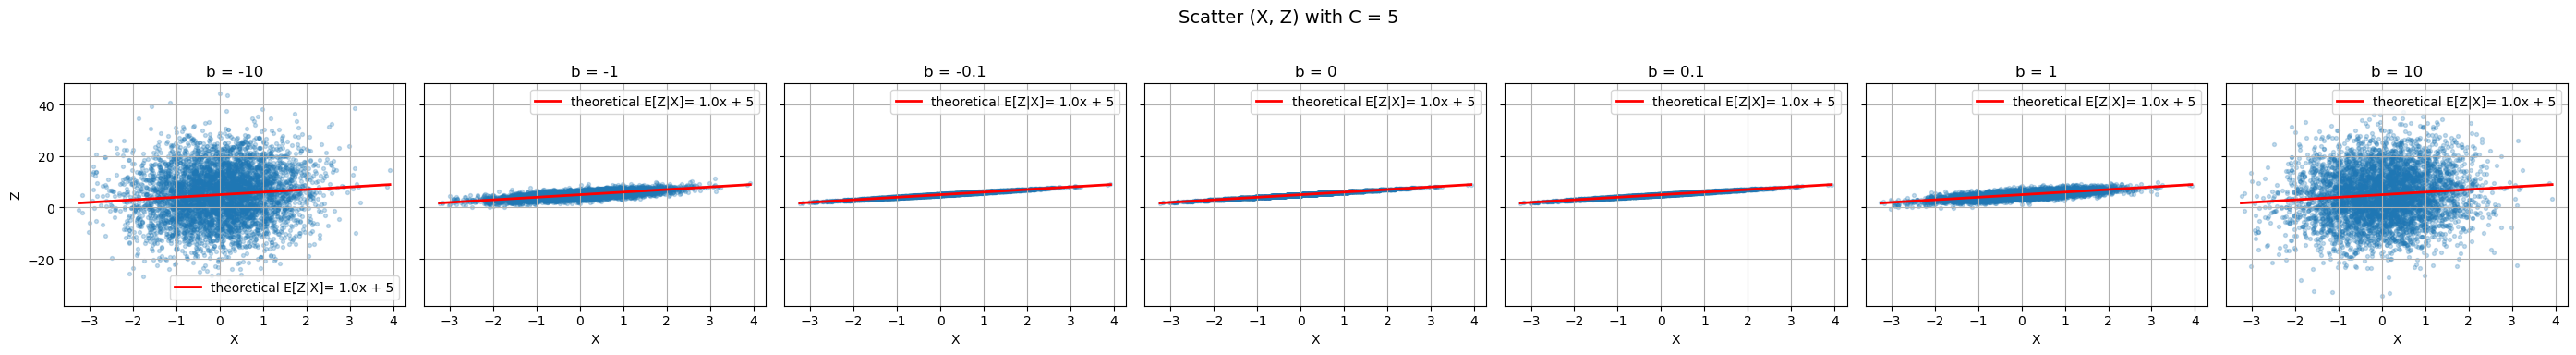

  a      b   C | Cov(X,Y)_emp  Cov(X,Y)_theo | Cov(X,Z)_emp  Cov(X,Z)_theo |  E[Z]_emp E[Z]_theo |  Var(Z)_emp Var(Z)_theo
----------------------------------------------------------------------------------------------------------------------------------
  1 -10.00   0 |     -0.00182        0.00000 |      1.01094        1.00000 |   0.10434   0.00000 |   103.10700   101.00000
  1  -1.00   0 |     -0.00182        0.00000 |      0.99459        1.00000 |   0.01548   0.00000 |     2.01719     2.00000
  1  -0.10   0 |     -0.00182        0.00000 |      0.99296        1.00000 |   0.00659   0.00000 |     1.00334     1.01000
  1   0.00   0 |     -0.00182        0.00000 |      0.99277        1.00000 |   0.00560   0.00000 |     0.99277     1.00000
  1   0.10   0 |     -0.00182        0.00000 |      0.99259        1.00000 |   0.00461   0.00000 |     1.00262     1.01000
  1   1.00   0 |     -0.00182        0.00000 |      0.99096        1.00000 |  -0.00427   0.00000 |     2.00992     2.00000
  1  10.

In [4]:
# Código Python para resolver a Questão 5
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

N = 5000
# Gerar X e Y independentes ~ N(0,1)
X = np.random.randn(N)
Y = np.random.randn(N)

a = 1.0
b_values = [-10, -1, -0.1, 0, 0.1, 1, 10]
C_values = [0, 5]

# funções auxiliares: estimador de cov (populacional)
def pop_cov(u, v):
    return np.mean((u - np.mean(u)) * (v - np.mean(v)))

def pop_var(u):
    return np.mean((u - np.mean(u))**2)

results = []

for C in C_values:
    # montar uma figura com subplots para cada b
    fig, axes = plt.subplots(1, len(b_values), figsize=(4*len(b_values), 4), sharey=True)
    fig.suptitle(f"Scatter (X, Z) with C = {C}", fontsize=14)
    for idx, b in enumerate(b_values):
        Z = a * X + b * Y + C

        # estimativas empíricas (população)
        cov_XY_emp = pop_cov(X, Y)
        cov_XZ_emp = pop_cov(X, Z)
        E_Z_emp = np.mean(Z)
        Var_Z_emp = pop_var(Z)

        # valores teóricos
        cov_XY_theo = 0.0
        cov_XZ_theo = a
        E_Z_theo = C
        Var_Z_theo = a*a + b*b

        results.append({
            'a': a, 'b': b, 'C': C,
            'Cov(X,Y)_emp': cov_XY_emp, 'Cov(X,Y)_theo': cov_XY_theo,
            'Cov(X,Z)_emp': cov_XZ_emp, 'Cov(X,Z)_theo': cov_XZ_theo,
            'E[Z]_emp': E_Z_emp, 'E[Z]_theo': E_Z_theo,
            'Var(Z)_emp': Var_Z_emp, 'Var(Z)_theo': Var_Z_theo
        })

        # Plot scatter
        ax = axes[idx]
        ax.scatter(X, Z, s=8, alpha=0.25)
        # reta teórica E[Z|X] = a*x + C
        xs = np.array([X.min(), X.max()])
        ys_theo = a * xs + C
        ax.plot(xs, ys_theo, 'r-', lw=2, label=f'theoretical E[Z|X]= {a}x + {C}')
        ax.set_title(f"b = {b}")
        ax.set_xlabel("X")
        if idx == 0:
            ax.set_ylabel("Z")
        ax.grid(True)
        ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Imprimir tabela comparativa (formatada)
print(f"{'a':>3} {'b':>6} {'C':>3} | {'Cov(X,Y)_emp':>12} {'Cov(X,Y)_theo':>14} | {'Cov(X,Z)_emp':>12} {'Cov(X,Z)_theo':>14} | {'E[Z]_emp':>9} {'E[Z]_theo':>9} | {'Var(Z)_emp':>11} {'Var(Z)_theo':>11}")
print("-"*130)
for r in results:
    print(f"{r['a']:3.0f} {r['b']:6.2f} {r['C']:3.0f} | {r['Cov(X,Y)_emp']:12.5f} {r['Cov(X,Y)_theo']:14.5f} | {r['Cov(X,Z)_emp']:12.5f} {r['Cov(X,Z)_theo']:14.5f} | {r['E[Z]_emp']:9.5f} {r['E[Z]_theo']:9.5f} | {r['Var(Z)_emp']:11.5f} {r['Var(Z)_theo']:11.5f}")


**Análise dos resultados**

- $\operatorname{Cov}(X,Y)$ (empírico) deve ficar próximo de $0$ — pequenas diferenças são ruído amostral (N=5000).  
- $\operatorname{Cov}(X,Z)$ (empírico) deve ficar próximo de $a$, pois  
  $\operatorname{Cov}(X,Z)=\operatorname{Cov}(X,aX+bY+C)=a\operatorname{Var}(X)+b\operatorname{Cov}(X,Y)=a$.  
- $E[Z]$ (empírico) deve ficar próximo de $C$ (pois $E[Z]=aE[X]+bE[Y]+C=C$).  
- $\operatorname{Var}(Z)$ (empírico) deve ficar próximo de $a^{2}+b^{2}$ (já que $\operatorname{Var}(Z)=a^{2}\operatorname{Var}(X)+b^{2}\operatorname{Var}(Y)+2ab\operatorname{Cov}(X,Y)=a^{2}+b^{2}$).  

- **Gráficos de dispersão $(X,Z)$:** a reta vermelha $y=ax+C$ representa $E[Z\mid X=x]$ (porque $E[Y\mid X]=E[Y]=0$).  
  - A nuvem de pontos fica centrada em torno dessa reta.  
  - A dispersão vertical em torno da reta é causada por $bY$; portanto, quanto maior $|b|$, maior a variância vertical e mais "espalhada" a nuvem.  
  - A inclinação observada da nuvem (slope ≈ $\operatorname{Cov}(X,Z)/\operatorname{Var}(X)$) tende a $a$. Quando $|b|$ é grande, a relação linear entre $X$ e $Z$ ainda existe, mas fica menos evidente visualmente devido ao ruído de $bY$.

**Observação prática:** pequenas discrepâncias entre empírico e teórico são esperadas por ser uma amostra finita; aumentos em $N$ reduzem esse erro amostral.